# **Teste Estagiário Analytics - QUOD**
### **Análise de dados de vendas Simulados**

Neste teste, o objetivo é simular e analisar um conjunto de dados de vendas para demonstrar habilidades em programação, limpeza de dados, análise exploratória, consulta de dados e capacidade de extrair insights de negócio, além de comunicá-los de forma eficaz.

Seguirei boas práticas de documentação e organização para uma melhor visualização e entendimento de todas as etapas seguintes.

# **Pipeline de Trabalho**

Este notebook seguirá a seguinte estrutura para garantir uma abordagem organizada:

1. **Configuração do ambiente:** Preparar o ambiente de trabalho com uma configuração inicial

2. **Geração e Visão Geral dos Dados:** Simulação do dataset e primeiro contato com a sua estrutura.

3. **Diagnóstico e Limpeza dos Dados:** Identificação e correção de problemas de qualidade.

4. **Análise Exploratória de Dados (EDA):** Investigação dos dados limpos para encontrar padrões e insights.

5. **Elaboração das Consultas SQL:** Construção das queries solicitadas.



# **1. Configuração do Ambiente**

Neste etapa será executado a preparação do ambiente de trabalho. Isso envolve o import das bibliotecas necessárias, configuração de visualização e criação da estrutura de pastas padrão para projetos de dados `(scripts, data, reports)`, garantindo que todos os artefatos gerados ao longo do projeto sejam armazenados de forma organizada nos locais corretos.

## **1.1 Imports e visualização**

Imports das bibliotecas necessárias e configurações iniciais para padronização das futuras visualizações dos insights.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import random
from datetime import date, timedelta
import warnings

warnings.filterwarnings('ignore') # Removendo avisos desnecessários = saída mais limpa

# Configurando visualização (Estilo) padronizando
sns.set_style('whitegrid')                # Estilo do gráfico seaborn
plt.rcParams['figure.figsize'] = [12, 6]  # Tamanho padrão para as figuras
plt.rcParams['font.size'] = 12            # Tamanho de fonte Padrão

print("Bibliotecas necessárias importadas e configurações de visualização aplicadas com sucesso!")

Bibliotecas necessárias importadas e configurações de visualização aplicadas com sucesso!


## **1.2 Estruturação das Pastas**

Criarei a estruturação das pastas para salvar os arquivos.

In [2]:
# Definindo o nome das pastas
pastas = ['scripts', 'data', 'reports']

# Criando as pastas
for pasta in pastas:
  if not os.path.exists(pasta):
    os.makedirs(pasta)
    print(f"pasta {pasta} criada com sucesso!")
  else:
    print(f"pasta {pasta} já existe.")


pasta scripts já existe.
pasta data já existe.
pasta reports já existe.


# **2. Geração e Visão Geral dos Dados**

Nesta etapa será criado um script para simular um dataset de vendas. optei por expandir o dataset para garantir insights com maior validade estatística e relevância de negócio, então serão gerados **5000 registros** contendo as colunas `ID, Data, Produto, Categoria, Quantidade e Preço`. Serão **15 produtos distribuídos igualmente em 5 categorias distintas** (3 produtos por categoria), permitindo uma comparação mais justa e análises mais aprofundadas.

- Irei manter a regra de negócio relacionado ao **período das vendas de 01/01/2023 a 31/12/2023.**

- Para tornar os dados mais realistas, os produtos terão **categorias e faixas de preço pré-definidas.**

Também será executado a parte de tornar o Dataset "Sujo", com a finalidade de torna-lo mais realista (No sentido de que, na grande maioria das vezes, sempre obtemos datasets com valores inconsistentes). Para, após isso, conseguir executar as próximas etapas de tratamento dos dados, que envolve a limpeza geral, por exemplo, remoção de duplicatas, conversão de tipos de dados e tratamento de valores faltantes.

Ao final de tudo, salvarei esse arquivo contendo os dados limpos na pasta `data`.

## **2.1 Simulação do Dataset de Vendas**

Aqui é o ponto de partida dos dados, onde vou criar todo o script de criação do dataset com dados simulados.

In [3]:
# Dicionário de configuração com 15 produtos distribuídos em 5 categorias equilibradas

produtos_supermercado_config = {
    # Categoria: Mercearia
    'Arroz Branco 5kg': {'categoria': 'Mercearia', 'preco_range': (25.00, 35.00)},
    'Feijão Carioca 1kg': {'categoria': 'Mercearia', 'preco_range': (8.00, 12.00)},
    'Biscoito Recheado': {'categoria': 'Mercearia', 'preco_range': (3.00, 5.00)},

    # Categoria: Laticínios e Frios
    'Leite Integral 1L': {'categoria': 'Laticínios e Frios', 'preco_range': (5.00, 8.00)},
    'Queijo Mussarela Fatiado 200g': {'categoria': 'Laticínios e Frios', 'preco_range': (12.00, 18.00)},
    'Iogurte Natural Copo': {'categoria': 'Laticínios e Frios', 'preco_range': (3.00, 6.00)},

    # Categoria: Bebidas
    'Refrigerante 2L': {'categoria': 'Bebidas', 'preco_range': (7.00, 11.00)},
    'Suco de Laranja 1L': {'categoria': 'Bebidas', 'preco_range': (8.00, 13.00)},
    'Água Mineral 1.5L': {'categoria': 'Bebidas', 'preco_range': (2.00, 4.00)},

    # Categoria: Hortifrúti
    'Banana Prata Kg': {'categoria': 'Hortifrúti', 'preco_range': (5.00, 9.00)},
    'Tomate Kg': {'categoria': 'Hortifrúti', 'preco_range': (6.00, 12.00)},
    'Cebola Kg': {'categoria': 'Hortifrúti', 'preco_range': (5.00, 10.00)},

    # Categoria: Limpeza
    'Sabão em Pó 1kg': {'categoria': 'Limpeza', 'preco_range': (15.00, 25.00)},
    'Detergente Líquido 500ml': {'categoria': 'Limpeza', 'preco_range': (2.00, 4.50)},
    'Água Sanitária 1L': {'categoria': 'Limpeza', 'preco_range': (4.00, 7.00)}
}

lista_produtos = list(produtos_supermercado_config.keys())

# Geração dos dados de vendas

vendas_lista = [] # Aqui irá ficar a lista das vendas
data_inicio = date(2023, 1, 1)
total_dias = 364

print("Iniciando a simulação de 5.000 registros de vendas")

for i in range(5000):
  produto_escolhido = random.choice(lista_produtos) # Escolhe um produto randomico da lista

  dias_aleatorios = random.randint(0, total_dias) # Ocorre o sorteio de um número de 0 a 364
  data_venda = data_inicio + timedelta(days=dias_aleatorios) # Gera data de venda aleatória a partir da soma com o número sorteado

  config = produtos_supermercado_config[produto_escolhido] # Usa o produto como chave para consultar os atributos dele no nosso catalógo

  # Atribuindo informações à variáveis
  categoria = config['categoria']
  preco_min, preco_max = config['preco_range']
  preco_venda = round(random.uniform(preco_min, preco_max), 2) # Gerando preço aleatório com 2 casas decimais
  quantidade_vendida = random.randint(1, 10)


  # Dic da tabela vendas contendo as informações únicas de cada transação
  venda = {
      'ID': i + 1,
      'Data': data_venda.strftime('%Y-%m-%d'),
      'Produto': produto_escolhido,
      'Categoria': categoria,
      'Quantidade': quantidade_vendida,
      'Preço': preco_venda
  }

  vendas_lista.append(venda)

print("Simulação finalizada!")

df_final_bruto = pd.DataFrame(vendas_lista) # Transformando em um Dataframe

print(f"\nDataframe criado com sucesso! contém {len(df_final_bruto)} registros")
display(df_final_bruto.head())
display(df_final_bruto.tail())

Iniciando a simulação de 5.000 registros de vendas
Simulação finalizada!

Dataframe criado com sucesso! contém 5000 registros


,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-09-26,Queijo Mussarela Fatiado 200g,Laticínios e Frios,8,15.83
1,2,2023-08-20,Feijão Carioca 1kg,Mercearia,1,9.01
2,3,2023-03-06,Arroz Branco 5kg,Mercearia,9,33.92
3,4,2023-04-07,Água Sanitária 1L,Limpeza,7,4.52
4,5,2023-10-10,Tomate Kg,Hortifrúti,10,11.79


,ID,Data,Produto,Categoria,Quantidade,Preço
4995,4996,2023-12-22,Leite Integral 1L,Laticínios e Frios,2,5.63
4996,4997,2023-03-28,Feijão Carioca 1kg,Mercearia,5,11.75
4997,4998,2023-11-14,Sabão em Pó 1kg,Limpeza,3,20.59
4998,4999,2023-11-26,Leite Integral 1L,Laticínios e Frios,8,5.02
4999,5000,2023-11-25,Leite Integral 1L,Laticínios e Frios,5,5.58


## **2.2 Tornando o Dataset "Sujo"**

Aqui vamos inserir algumas imperfeições no nosso dataset, por exemplo:

- **Valores Ausentes:** Inserir alguns valores `NaN` em algumas linhas.
- **Dados duplicados:** Inserir Cópias exatas de registros.
- **Tipo de Dado Incorreto:** Modificar um valor na coluna preço para um texto, fazendo como que a coluna seja interpretada com object pelo Pandas.

Ao final irei salvar na pasta `data`para simular um conjunto de dados sujos que normalmente analistas receberiam para trabalhar.

In [4]:
# Como boa prática, irei criar uma cópia do dataset original
df_sujo = df_final_bruto.copy()
print("Cópia do dataset bruto original criada com sucesso! Pronto para simular erros!")

# 1 - Inserindo Valores Nulos (NaN)
# Selecionando alguns Indices Aleatórios para tornar os valores NaN
indices_preco_nulo = [50, 1220, 32, 4, 4560, 3244, 500, 2345, 4999]
indices_categoria_nula = [2, 69, 4996, 567, 2774, 1030, 223, 3301, 200]

df_sujo.loc[indices_preco_nulo, 'Preço'] = np.nan # Procurando pela linha do indice e Coluna PREÇO = transformando em nulo utilizando numpy
df_sujo.loc[indices_categoria_nula, 'Categoria'] = np.nan # Fazendo o mesmo para coluna CATEGORIA
print(f"{len(indices_preco_nulo)} valores nulos inseridos na coluna 'Preço'!")
print(f"{len(indices_categoria_nula)} valores nulos inseridos na coluna 'Categoria'!")

# 2 - Inserindo valores duplicados
indices_para_duplicar = df_sujo.loc[[120, 950, 2800]] # Passando uma lista de registros para duplicar

df_sujo = pd.concat([df_sujo, indices_para_duplicar], ignore_index=True) # A partir do dataset principal, vamos concatenar os registros duplicados ao final
                                                                        # Usando ignore_index=True para criar uma nova numeração sequencial
print(f"{len(indices_para_duplicar)} registros duplicados inseridos ao final do dataset!")

# 3 - Inserir Tipo de dado incorreto
# Simulando um errro de entrada de dados na coluna 'Preço'

df_sujo.loc[3500, 'Preço'] = 'INVÁLIDO' # Transformando o registro 3500 da coluna 'preço' em inválido
print("Um valor de texto ('INVÁLIDO') foi inserido na coluna 'Preço'!")

print("Verificando o dataset 'sujo'...")

# Aqui o objetivo é verificar se as alterações estão corretas
print("Verificando informações gerais:")
display(df_sujo.info())
print("\nVerificando valores nulos nas coluanas:")
display(df_sujo.isnull().sum())
print("\nVerificando a existência de valores duplicados:")

duplicata_suja = df_sujo.duplicated().sum()
print(f"\nForam encontrados {duplicata_suja} registros duplicados.")

print("\nVerificando a alteração no preço do registro 3500:")
display(df_sujo.loc[3500])

# Salvando o dataset sujo na pasta
caminho_arquivo_sujo = 'data/data_raw.csv'
df_sujo.to_csv(caminho_arquivo_sujo, index=False)

print(f"\nDataset 'Sujo' com {len(df_sujo)} registros salvo em {caminho_arquivo_sujo}!")




Cópia do dataset bruto original criada com sucesso! Pronto para simular erros!
9 valores nulos inseridos na coluna 'Preço'!
9 valores nulos inseridos na coluna 'Categoria'!
3 registros duplicados inseridos ao final do dataset!
Um valor de texto ('INVÁLIDO') foi inserido na coluna 'Preço'!
Verificando o dataset 'sujo'...
Verificando informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          5003 non-null   int64 
 1   Data        5003 non-null   object
 2   Produto     5003 non-null   object
 3   Categoria   4994 non-null   object
 4   Quantidade  5003 non-null   int64 
 5   Preço       4994 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.6+ KB


None


Verificando valores nulos nas coluanas:


,0
ID,0
Data,0
Produto,0
Categoria,9
Quantidade,0
Preço,9



Verificando a existência de valores duplicados:

Foram encontrados 3 registros duplicados.

Verificando a alteração no preço do registro 3500:


,3500
ID,3501
Data,2023-04-03
Produto,Sabão em Pó 1kg
Categoria,Limpeza
Quantidade,8
Preço,INVÁLIDO



Dataset 'Sujo' com 5003 registros salvo em data/data_raw.csv!


# **3. Limpeza e Tratamento dos Dados**
Nesta parte, como o titulo do tópico já indica, vou realizar a limpeza e tratamento dos dados que acabamos de criar a partir da simulação. Essa parte tem que ser feita com muita atenção pois será crucial para a proxima etapa de Analise exploratória dos dados.

O objetivo é aqui é transformar o dataset bruto e com falhas `data_raw.csv`, que foi gerado e salvo na pasta `data`, em um dataset limpo, confiável e pronto para análise.

O processo será dividido em três fases:

- **Diagnóstico:** Onde os dados serão carregados, verificados e os problemas serão quantificados.
- **Limpeza dos Dados:** Aqui será feito o tratamento de cada problema identificado.
- **Verificação Final:** Onde será feita a confirmação de todo o nosso processo de tratamento para salvar em um dataset limpo.

## **3.1 Carregamento e Diagnóstico**

O primeiro passo antes da limpeza será identificar quais os problemas que iremos tratar, então vou carregar o arquivo `data_raw.csv` para realizar as próximas operações e entender com o que estamos lidando.

In [5]:
df = pd.read_csv('data/data_raw.csv') # Carregando o dataset 'sujo' criado na etapa anterior

print("Iniciando o diagnóstico do dataset 'sujo'...")

print("\n Verificando os 5 primeiros registros:")
display(df.head())
print("\n Verificando os 5 ultimos registros:")
display(df.tail())

print("\ninformações gerais:")
display(df_sujo.info())
print("\nSoma dos valores nulos por coluanas:")
display(df_sujo.isnull().sum())

print("\nRegistros duplicados:")
duplicatas = df.duplicated().sum()

print(f"Foram encontrados {duplicatas} registros duplicados.")

Iniciando o diagnóstico do dataset 'sujo'...

 Verificando os 5 primeiros registros:


,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-09-26,Queijo Mussarela Fatiado 200g,Laticínios e Frios,8,15.83
1,2,2023-08-20,Feijão Carioca 1kg,Mercearia,1,9.01
2,3,2023-03-06,Arroz Branco 5kg,NaN,9,33.92
3,4,2023-04-07,Água Sanitária 1L,Limpeza,7,4.52
4,5,2023-10-10,Tomate Kg,Hortifrúti,10,NaN



 Verificando os 5 ultimos registros:


,ID,Data,Produto,Categoria,Quantidade,Preço
4998,4999,2023-11-26,Leite Integral 1L,Laticínios e Frios,8,5.02
4999,5000,2023-11-25,Leite Integral 1L,Laticínios e Frios,5,NaN
5000,121,2023-11-14,Água Mineral 1.5L,Bebidas,3,2.01
5001,951,2023-12-22,Sabão em Pó 1kg,Limpeza,9,23.82
5002,2801,2023-03-15,Água Mineral 1.5L,Bebidas,3,3.64



informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          5003 non-null   int64 
 1   Data        5003 non-null   object
 2   Produto     5003 non-null   object
 3   Categoria   4994 non-null   object
 4   Quantidade  5003 non-null   int64 
 5   Preço       4994 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.6+ KB


None


Soma dos valores nulos por coluanas:


,0
ID,0
Data,0
Produto,0
Categoria,9
Quantidade,0
Preço,9



Registros duplicados:
Foram encontrados 3 registros duplicados.


## **3.2 Limpeza dos dados**
Feito o diagnóstico, agora será realizado o tratamento de cada dado inconsistente de forma isolada para uma melhor organização.

### **3.2.1 Tratamento do Tipo de Dado (Coluna 'Preço')**

Como podemos perceber o nosso `df.info()` mostra que o Dtype da coluna `Preço` está igual a Object, o que é um problema, pois como é uma coluna essencialmente numérica, deveríamos ter a possibilidade de realizar calculos com ela, mas por possuir o Dtype igual a Object, não será permitido.

Para resolver, eu poderia muito bem utilizar o `pd.to_numeric(df['Preço'], errors='coerce')` para converter todos os valores da coluna `Preço` que não são numéricos em NULOS (NaN), mas isso seria bastante irrealista, pelo motivo de que **só estou resolvendo dessa forma especifica por saber que no nosso dataset existe apenas UM VALOR, dentre todos os 5000 registros, que está incorreto, então transformar esse valor em nulo não teria problema.**

Então levando em conta o mundo real, isso poderia desenvolver diversos problemas, como **destruir milhares de dados saudáveis (dados válidos como "12,50"), convertendo tudo em NaN.**

Para uma abordagem mais realista, vamos supor de que não tenho conhecimento da localização do problema, apenas sei que ele existe a partir do diagnóstico, como eu faria?

A melhor maneira de fazer isso é tentar encontrar os valores que quebram a conversão.

Da mesma forma, a coluna `Data` também foi importada como object, o que a torna inadequada para análises temporais. Para agruparmos as vendas por mês, analisar tendências ou filtrar por períodos específicos, é fundamental que essa coluna seja convertida para o tipo datetime, que é o formato padrão do pandas para manipulação de datas.

#### **Investigação**

Aqui o objetivo é apenas encontrar quais valores estão sendo problemáticos pra nossa coluna `Preço`, sem alterar os dados. Para a coluna `Data` parece ser mais simples, pois o formato é consistente.



In [6]:
# Lista para armazenar os valores que não são numéricos
valores_problematicos = []

for valor in df['Preço'].unique(): # Usando unique() para pegar cada valor único da coluna
  if pd.isna(valor): # Caso o valor ja seja nulo, vamos ignorar
    continue

  try:
    float(valor) # Tentando converter o valor para o tipo float
  except ValueError: # Caso gerar o erro significa que o valor não é número
    valores_problematicos.append(valor) # Adicionando esse valor na lista

if len(valores_problematicos) > 0:
  print(f"Investigação concluída! A lista possui {len(valores_problematicos)} valor(es) problemáticos.")
  print(f"São eles: {valores_problematicos}")
else:
  print("Investigação concluída! Nenhum valor problemático encontrado.")

# Verificamos se o formato da data parece correto (YYYY-MM-DD)
primeira_data = df['Data'].iloc[0] # Pega o primeiro valor da coluna
if isinstance(primeira_data, str) and len(primeira_data) == 10:
    print(f"\nA coluna parece estar no formato de texto (string) correto. Exemplo: '{primeira_data}'")
else:
    print("\nO formato da coluna 'Data' parece inesperado.")

Investigação concluída! A lista possui 1 valor(es) problemáticos.
São eles: ['INVÁLIDO']

A coluna parece estar no formato de texto (string) correto. Exemplo: '2023-09-26'


#### **Correção**

Aqui o objetivo é realizar o processo de correção do tipo de dado das colunas. Com a investigação feita na célula anterior, podemos seguir um processo direcionado e seguro, dessa vez sabendo com o que estamos lidando.

In [7]:
print("Iniciando o processo de correção do tipo da coluna preço...")

# Corrigindo a coluna 'Preço'
df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce') # O errors='coerce' transformará em NaN os valores não numéricos
print("\nColuna convertida para o tipo numérico")

# Corrigindo a coluna 'Data'
df['Data'] = pd.to_datetime(df['Data'])
print("Coluna convertida para o tipo datetime")

# Vamos fazer uma verificação imediata
print("\n Verificação dos Dtrypes após correções:")
df.info()

Iniciando o processo de correção do tipo da coluna preço...

Coluna convertida para o tipo numérico
Coluna convertida para o tipo datetime

 Verificação dos Dtrypes após correções:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          5003 non-null   int64         
 1   Data        5003 non-null   datetime64[ns]
 2   Produto     5003 non-null   object        
 3   Categoria   4994 non-null   object        
 4   Quantidade  5003 non-null   int64         
 5   Preço       4993 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 234.6+ KB


### **3.2.2 Tratamento dos Dados Duplicados**

No diagnóstico percebemos que nosso dataset possui o total de 3 dados duplicados. Os dados duplicados acabam inflando indevidamente métricas importates como o total de vendas, a quantidade de itens vendidos, distorcendo análises importantes de frequência e outros insights, levando a conclusões erradas sobre a nossa base de dados.

Objetivo aqui é desenvolver uma estratégia para remover de forma segura todas as linhas que são cópias exatas de outras e redefinir O Dataframe para garantir uma enumeração sequencial correta e evitar buracos no índice que poderiam ocasionar em problemas futuros.

In [8]:
registros_antes = len(df) # verificando a quantidade de registros antes da remoção das duplicatas
print(f"Quantidade de registros antes da remoção de duplicatas: {registros_antes}")

# Aqui acontece a remoção das duplicatas .drop_duplicates() e o reset do indice a partir do reset_index(drop=True)
df = df.drop_duplicates().reset_index(drop=True)

# Verificando o a quantidade de registros antes e depois
registros_depois = len(df)
duplicatas_removidas = registros_antes - registros_depois
print(f"\nForam removidas {duplicatas_removidas} duplicatas")
print(f"Quantidade de registros depois da remoção de duplicatas: {registros_depois}")

print(f"\nVerificação final:")
duplicatas_restantes = df.duplicated().sum()
if duplicatas_restantes == 0:
  print("Nenhuma duplicata encontrada! Processo executado com sucesso.")
else:
  print(f"Ainda existem {duplicatas_restantes} duplicatas!")

Quantidade de registros antes da remoção de duplicatas: 5003

Foram removidas 3 duplicatas
Quantidade de registros depois da remoção de duplicatas: 5000

Verificação final:
Nenhuma duplicata encontrada! Processo executado com sucesso.


In [9]:
# Apenas uma verificação extra:
# Como nós sabemos que nossos registros duplicados estavam ao final do dataFrame, vamos dar uma ultima olhada
display(df.tail())
print("\nPodemos ver então que os ultimos 3 registros que estavam duplicados sumiram, então a execução do processo foi feita com êxito!")

,ID,Data,Produto,Categoria,Quantidade,Preço
4995,4996,2023-12-22,Leite Integral 1L,Laticínios e Frios,2,5.63
4996,4997,2023-03-28,Feijão Carioca 1kg,NaN,5,11.75
4997,4998,2023-11-14,Sabão em Pó 1kg,Limpeza,3,20.59
4998,4999,2023-11-26,Leite Integral 1L,Laticínios e Frios,8,5.02
4999,5000,2023-11-25,Leite Integral 1L,Laticínios e Frios,5,NaN



Podemos ver então que os ultimos 3 registros que estavam duplicados sumiram, então a execução do processo foi feita com êxito!


### **3.2.3 Tratamento dos Valores Nulos**

Passaremos para a ultima etapa, onde terei que desenvolver uma estratégia para resolver o problema dos valores NaN que existem tanto na coluna `Preço` quanto na coluna `Categoria`. Valores nulos impedem a gente de termos análises mais exatas, mais detalhadas e mais aprofundadas sobre os nossos dados. então é importante verificar a melhor forma de resolver isso

As estratégias podem variar, desde substituir esses valores pela mediana, moda e média até a remoção completa desses registros. Tudo depende de como esses valores estão distribuídos no nosso DataFrame, e como eles de fato influenciam nas nossas futuras análises.

**Qual estratégia irei tomar?**

Dado que a porcentagem de dados ausentes é extremamente baixa, **aproximadamente 0,4% diante dos nossos 5000 registros (19/5000 * 100)** , a estratégia que irei tomar será de remover esses registros incompletos **(Dropping)**, com o intuito de garantir uma análise exploratória subsequente baseada em dados observados e autênticos, pois a integridade e transparência são cruciais no nosso foco que é a Análise e criação de insights a partir dos dados.

Mas caso estivessemos com uma quantidade elevada de valores nulos, talvez até com o intuito de desenvolver um processo de machine learning, seria bastante interessante pensarmos em utilizar o método de **imputação por Grupo**, por exemplo:

Preencher o preço faltante de uma "Água Mineral" com a mediana dos preços de todas as outras vendas de Água Mineral.

In [10]:
registros_antes = len(df)
print(f"Quantidade de registros antes da remoção de valores nulos: {registros_antes}")
print("\nContagem de valores nulos por coluna antes da remoção:")
display(df.isnull().sum())

# Removendo as linhas onde preço e categoria são nulos
# subset garante que só olharemos para os valores NaN nas colunas especificadas
# inplace=True modifica o DataFrame diretamente
df.dropna(subset=['Preço', 'Categoria'], inplace=True)

registros_depois = len(df)
nulos_removidos = registros_antes - registros_depois
print(f"\nQuantidade de registros removidos: {nulos_removidos}")
print(f"quantidade de registros depois da remoção de valores nulos: {registros_depois}")
print("\nContagem de valores nulos por coluna depois da remoção:")
display(df.isnull().sum())


# Verificação final para garantir que não há mais nulos .sum().sum() retorna o valor total de nulos
if df.isnull().sum().sum() == 0:
  print("Nenhum valor nulo encontrado! Processo executado com sucesso.")
else:
  print("Ainda existem valores nulos!")

Quantidade de registros antes da remoção de valores nulos: 5000

Contagem de valores nulos por coluna antes da remoção:


,0
ID,0
Data,0
Produto,0
Categoria,9
Quantidade,0
Preço,10



Quantidade de registros removidos: 19
quantidade de registros depois da remoção de valores nulos: 4981

Contagem de valores nulos por coluna depois da remoção:


,0
ID,0
Data,0
Produto,0
Categoria,0
Quantidade,0
Preço,0


Nenhum valor nulo encontrado! Processo executado com sucesso.


## **3.3 Verificação final e Salvamento do Dataset Limpo**

Após aplicar todos os tratamentos, vamos realizar uma verificação finale e completa sobre os processos que desenvolvemos. O objetivo é garantir um certificado de qualidade para o nosso dataset, confirmando que está livre de inconsistências.

Ao final de tudo, o DataFrame será salvo no arquivo data_clean.csv, conforme solicitado no desafio. Este arquivo será base para toda a Análise Exploratória de Dados (EDA).

In [11]:
print("\n Informações gerais Finais e Tipos de Dados:")
display(df.info())

nulos_finais = df.isnull().sum().sum()
duplicatas_finais = df.duplicated().sum()

print(f"\nQuantidade de valores nulos no dataset: {nulos_finais}")
print(f"Quantidade de registros duplicados no dataset: {duplicatas_finais}")

# Salvando o arquivo limpo
if nulos_finais == 0 and duplicatas_finais == 0:
  caminho_arquivo_limpo = 'data/data_clean.csv'
  df.to_csv(caminho_arquivo_limpo, index=False)
  print(f"\nDataset limpo com {len(df)} registros salvo em {caminho_arquivo_limpo}!")

  print(f"\nExibindo uma amostra das 5 primeiras e 5 últimas linhas do DataFrame: ")
  display(df.head())
  display(df.tail())
else:
  print("\nDataset possui inconsistências e não foi salvo! Verifique as etapas anteriores.")


 Informações gerais Finais e Tipos de Dados:
<class 'pandas.core.frame.DataFrame'>
Index: 4981 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          4981 non-null   int64         
 1   Data        4981 non-null   datetime64[ns]
 2   Produto     4981 non-null   object        
 3   Categoria   4981 non-null   object        
 4   Quantidade  4981 non-null   int64         
 5   Preço       4981 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 272.4+ KB


None


Quantidade de valores nulos no dataset: 0
Quantidade de registros duplicados no dataset: 0

Dataset limpo com 4981 registros salvo em data/data_clean.csv!

Exibindo uma amostra das 5 primeiras e 5 últimas linhas do DataFrame: 


,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-09-26,Queijo Mussarela Fatiado 200g,Laticínios e Frios,8,15.83
1,2,2023-08-20,Feijão Carioca 1kg,Mercearia,1,9.01
3,4,2023-04-07,Água Sanitária 1L,Limpeza,7,4.52
5,6,2023-03-21,Banana Prata Kg,Hortifrúti,10,6.74
6,7,2023-02-17,Banana Prata Kg,Hortifrúti,6,7.86


,ID,Data,Produto,Categoria,Quantidade,Preço
4993,4994,2023-01-28,Água Mineral 1.5L,Bebidas,8,2.53
4994,4995,2023-03-29,Queijo Mussarela Fatiado 200g,Laticínios e Frios,7,12.60
4995,4996,2023-12-22,Leite Integral 1L,Laticínios e Frios,2,5.63
4997,4998,2023-11-14,Sabão em Pó 1kg,Limpeza,3,20.59
4998,4999,2023-11-26,Leite Integral 1L,Laticínios e Frios,8,5.02


# **4. Análise exporatória de Dados (EDA)**

Com o `data_clean.csv` em mãos e salvo na pasta `data`, vamos iniciar a fase de Análise Exploratória. O objetivo desta seção é **transformar os dados em informações e métricas** que vão nos a entender o comportamento das vendas, seus padrões e obter insights poderosos que no futuro poderão ser essenciais para tomada de decisões.

As análises daqui retirada, servirão de base para o relatório final de insights e para as consultas SQL.

Antes de irmos para a criação de gráficos e desenvolvimento de ideias para insights, irei responder as perguntas propostas pelo desafio:

- Calcule o total de vendas (Quantidade * Preço) por produto.
- Identifique o produto com o maior número de vendas totais.


## **4.1 Análise do faturamento por produto**

A primeira investigação é bem direta e uma das mais importantes para trabalhos relacionados a vendas: **identificar quais produtos geraram mais faturamento** e o **produto que gerou o maior faturamento.**

Os passos serão:

- **Criar Coluna Faturamento:** Para termos uma visualização no dataframe do faturamento de cada venda
- **Agregar os Produtos**: Visualizar o total de faturamento para cada produto especifico.
- **Ranqueamento e Identificação do Campeão em Faturamento:** Aqui é onde vamos ranquear os produtos do maior para o menor e verificar qual o produto campeão em Faturamento.

In [12]:
# Criando a coluna 'Faturamento' para ficar mais facil a visualização junto ao DataFrame
df['Faturamento'] = df['Quantidade'] * df['Preço']
display(df.head()) # Verificando a criação da coluna
print("Coluna 'Faturamento' criada com sucesso!")

# df.groupby() Aqui vamos separar o dataframe em grupos (visando o produto)
# E selecionando o faturamento de cada produto, somamos o valor total do faturamento usando o .sum()
faturamento_por_produto = df.groupby('Produto')['Faturamento'].sum().sort_values(ascending=False)

print("\nRanking de faturamento por produto:")
display(faturamento_por_produto)

produto_mais_faturado = faturamento_por_produto.index[0] # index para pegar o rótulo
maior_faturamento = faturamento_por_produto.iloc[0] # iloc para pegar o valor

print(f"\nO produto mais faturado foi '{produto_mais_faturado}' com um total de R${maior_faturamento:.2f} de faturamento.")



,ID,Data,Produto,Categoria,Quantidade,Preço,Faturamento
0,1,2023-09-26,Queijo Mussarela Fatiado 200g,Laticínios e Frios,8,15.83,126.64
1,2,2023-08-20,Feijão Carioca 1kg,Mercearia,1,9.01,9.01
3,4,2023-04-07,Água Sanitária 1L,Limpeza,7,4.52,31.64
5,6,2023-03-21,Banana Prata Kg,Hortifrúti,10,6.74,67.40
6,7,2023-02-17,Banana Prata Kg,Hortifrúti,6,7.86,47.16


Coluna 'Faturamento' criada com sucesso!

Ranking de faturamento por produto:


,Faturamento
Produto,
Arroz Branco 5kg,53763.38
Sabão em Pó 1kg,35512.44
Queijo Mussarela Fatiado 200g,28831.13
Suco de Laranja 1L,19877.61
Feijão Carioca 1kg,17311.33
Refrigerante 2L,17001.75
Tomate Kg,15023.93
Cebola Kg,14061.06
Banana Prata Kg,13059.78



O produto mais faturado foi 'Arroz Branco 5kg' com um total de R$53763.38 de faturamento.


## **4.2 Tendência de Vendas Mensal**

Após a identificação de quais produtos são os mais importantes, vamos verificar como as nossas vendas se distribuíram ao decorrer dos meses em 2023, nos ajudando a responder perguntas, como por exemplo:

- O nosso faturamento cresceu ou diminuiu ao longo de 2023?
- Quais foram os meses de maiores vendas?
- Houve algum evento que impactou nas nossas vendas?

Faturamento por mês:


,Faturamento
Data,
2023-01-01,22457.55
2023-02-01,20358.15
2023-03-01,20878.02
2023-04-01,22548.77
2023-05-01,23582.53
2023-06-01,21443.98
2023-07-01,21497.86
2023-08-01,23074.67
2023-09-01,22850.45


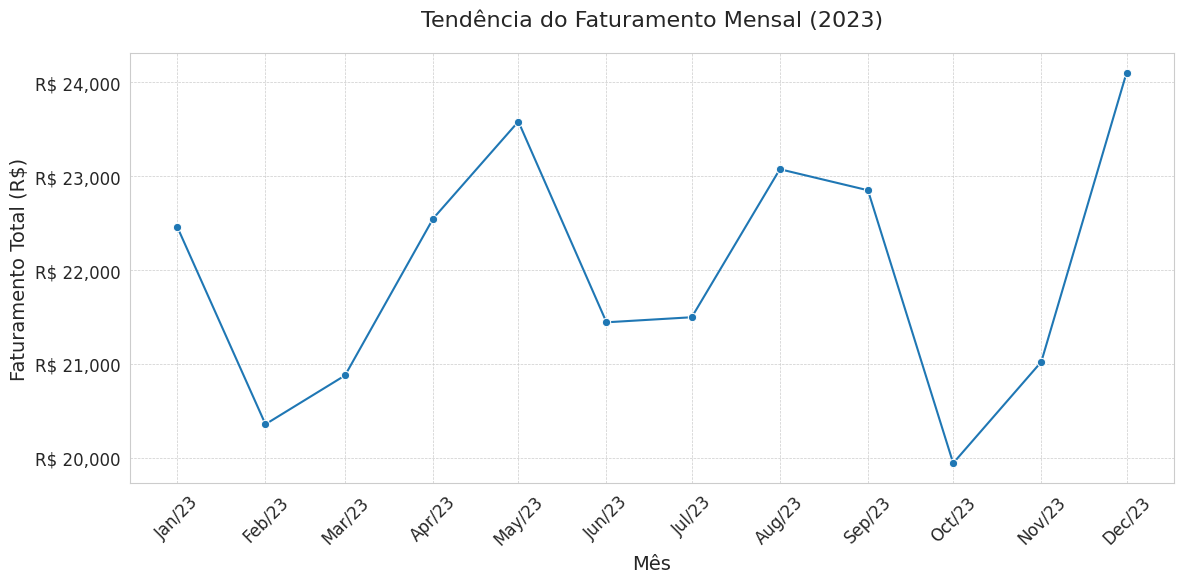

In [13]:
# Definindo a coluna DATA como nosso indice para trabalhar com séries temporais de forma eficiente
df_temporal = df.set_index('Data')

# Agrupando por inicio do mês com resample('MS') E somando todo o faturamento daquele mês
faturamento_mensal = df_temporal['Faturamento'].resample('MS').sum()
print("Faturamento por mês:")
display(faturamento_mensal)

# Criação do gráfico de linha, definindo o x e y, alem do markador e tipo de linha
ax = sns.lineplot(x=faturamento_mensal.index, y=faturamento_mensal.values, marker='o', linestyle='-')

# Adicionando titulo e rotulos para clareza do gráfico
plt.title('Tendência do Faturamento Mensal (2023)', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Faturamento Total (R$)', fontsize=14)

# Utilizarei uma formatação para o eixo Y exibir os valores como moeda brasileira
formatter = FuncFormatter(lambda y, _: f'R$ {y:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Forçando marcação para todos os meses e formatação para mostrar mês e ano de forma mais agradável (mês/ano)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y')) # Mes abreviado e ano com 2 digitos

plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout() # Ajusta o gráfico para garantir que tudo caiba na figura

plt.show()

### **Insights obtidos:**

Com base na visualização do faturamento ao longo de 2023, podemos extrair os seguintes insights de negócio:

1. **O Pico de venda:** Podemos observar que o mês que mais tivemos faturamento foi em dezembro, isso nos demonstra uma alta demanda por produtos, talvez por motivos festivos, já que dezembro é o mês do natal, um mês com feriados bem festivos e, muitas vezes, com alimentos em abundância.

2. **Volatilidade no Último semestre:** Isso indica como as vendas de fim de ano são extremamente concentradas em dezembro, sendo extremamente fraca em outubro e novembro. É de extrema necessidade investigar o motivo dessas vendas fracas, pois a Discrepância de faturamento é muito elevada, podendo estar ocasionadas por um baixo estoque, marketing ineficaz, problemas logísticos, alterações de preços e etc...

3. **Faturamento no Meio do Ano:** Na primeira metade do ano, podemos verificar uma crescente a partir de março até maio, isso pode indicar um consumo maior antes de chegarmos nas férias do meio do ano, normalmente quando algumas famílias viajam, o que explica o motivo das vendas terem diminuído e se manterem constante nesses dois meses (Junho e Julho), voltando a aumentar em agosto, quando termian as férias do meio do ano. Uma ideia seria focar mais em estratégias de vendas pré-ferias para esses meses da primeira metade do ano.

## **4.3 Análise Faturamento das Categorias**



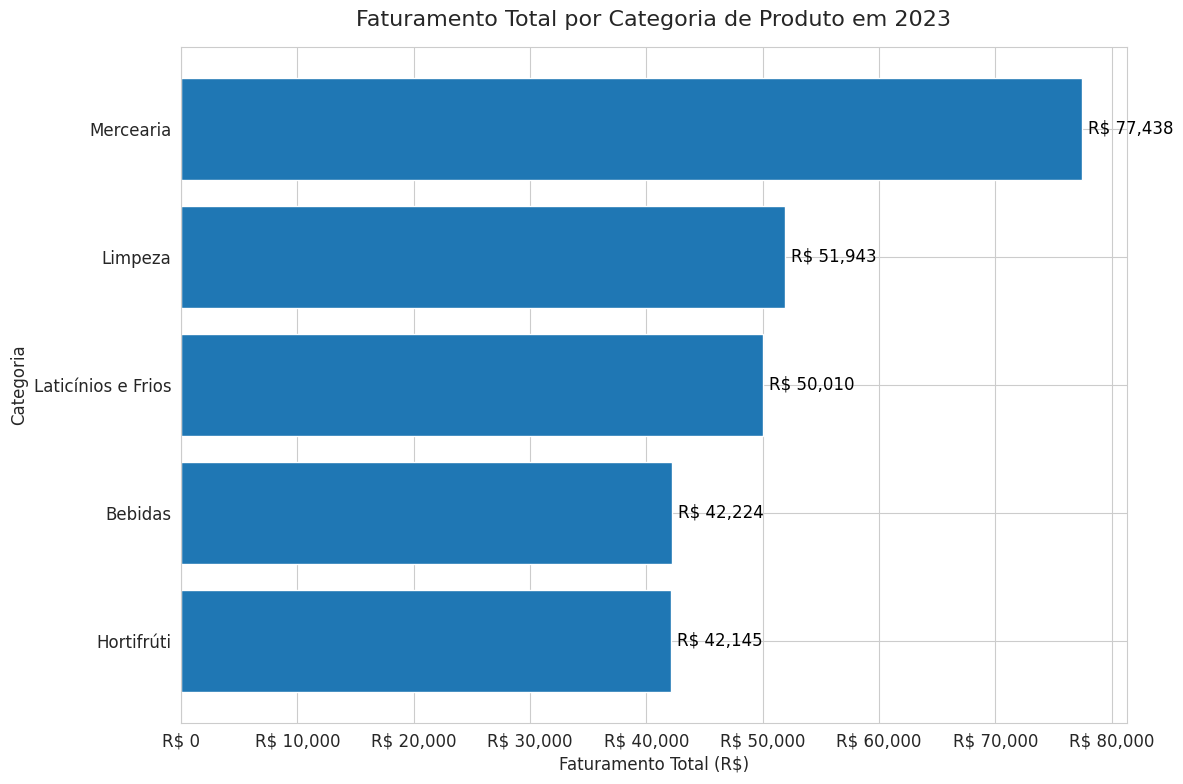

In [21]:

# Agrupando por Categoria e somando o Faturamento
faturamento_por_categoria = df.groupby('Categoria')['Faturamento'].sum().sort_values()

#  Criação do Gráfico de Barras Horizontais
# Usamos um gráfico de barras horizontais .barh() que é ideal para exibir
# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 8)) # Usando subplots para mais controle

# Plotando as barras
ax.barh(faturamento_por_categoria.index, faturamento_por_categoria.values)

# Adicionando títulos e rótulos
ax.set_title('Faturamento Total por Categoria de Produto em 2023', fontsize=16, pad=15)
ax.set_xlabel('Faturamento Total (R$)', fontsize=12)
ax.set_ylabel('Categoria', fontsize=12)

# Formatando o eixo X para exibir os valores como moeda brasileira
formatter = FuncFormatter(lambda x, _: f'R$ {x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

# Adicionar o valor de faturamento no final de cada barra para clareza
for i, v in enumerate(faturamento_por_categoria.values):
    ax.text(v + 500, i, f'R$ {v:,.0f}', color='black', va='center')

plt.tight_layout()
plt.show()

### **Insights Obtidos:**

Com base no faturamento total por categoria, podemos observar que:

1. **Maior Lucratividade:** De forma disparada, boa parte do nosso faturamento se deve a Mercearia, isso sugere que o principal motor da receita de vendas são os produtos básicos do dia a dia, e por ser um pilar financeiro do nosso négocio, devemos estar sempre atentos ao estoque e a logística envolvendo os produtos dessa categoria, pois acabam sendo de muita valia para as vendas.

2. **Oportunidade de Crescimento:** Basicamente empatados em faturamento, temos 'Bebidas' e 'Hortifrúti'. Isso indica que deveriamos focar mais em estratégias de vendas para esses produtos, por exemplo: Focando em um marketing maior para eles, o que poderia ocasionar em um maior número de vendas, equilibrando mais nosso ranking e diversificando mais o motivo de crescimento da nossa receita. Visualizar o faturamento de 'Limpeza' e 'Laticíneos e Frios', nos ajuda a entender esse equilíbrio e como um pouco de foco a mais nas outras categorias poderiam reduzir a dependência da categoria principal e explorar potenciais de crescimentos.


## **4.4 Análise do Volume de Vendas por Categoria e Mês**

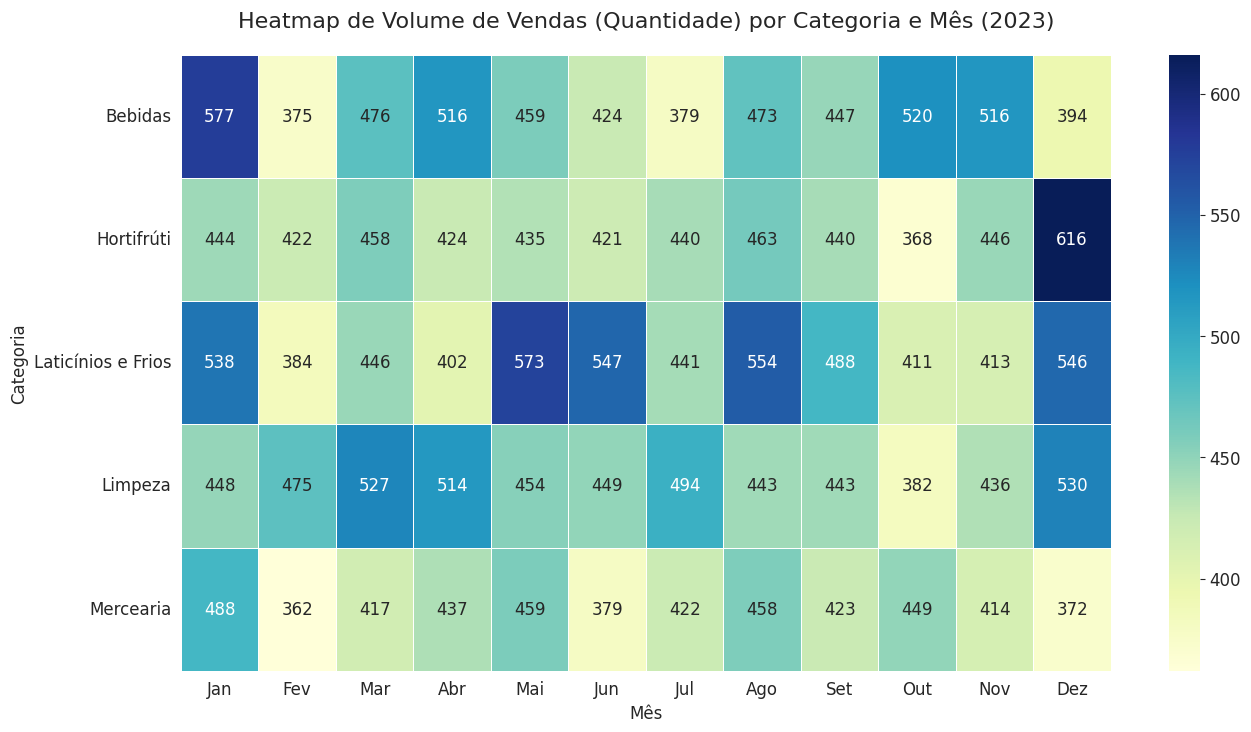

In [26]:
# Precisamos de uma tabela com Categorias nas linhas e Meses nas colunas
# Primeiro, extraímos o número do mês da coluna 'Data' para facilitar o agrupamento
df['Mês'] = df['Data'].dt.month

# Criamos uma tabela cruzada (pivot table) somando a QUANTIDADE por Categoria e Mês
# O método .unstack() transforma o índice de Mês em colunas
pivot_vendas_categoria = df.groupby(['Categoria', 'Mês'])['Quantidade'].sum().unstack(level='Mês')

# Renomeando as colunas de números (1, 2, 3...) para nomes de meses para maior clareza
nomes_meses = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun',
               7: 'Jul', 8: 'Ago', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
pivot_vendas_categoria.rename(columns=nomes_meses, inplace=True)


# Criação do Heatmap
plt.figure(figsize=(15, 8))


# annot=True: exibe os números de quantidade em cada célula
# fmt='d': formata os números como inteiros
# cmap='YlGnBu': esquema de cor
sns.heatmap(pivot_vendas_categoria, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

# Adicionando títulos e rótulos
plt.title('Heatmap de Volume de Vendas (Quantidade) por Categoria e Mês (2023)', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.yticks(rotation=0) # Mantém os nomes das categorias na horizontal

plt.show()

### **Insights Obtidos:**

Com base no Heatmap de volume de vendas por categoria e mês, podemos observar que:

1. **Consistência:** Podemos observar uma clara consistência na quantidade de vendas do produto de limpeza, com certeza é a categoria mais consistente do nosso gráfico, raramente sendo menor que 440 produtos vendidos por mês. Isso demonstra uma necessidade constante de compras e interesse por produtos de limpeza, o que sim, é uma necessidade humana básica. Sendo assim, é sempre necessário manter o estoque constante dos produtos dessa categoria e sempre atualizados, pois é uma certeza que irá ser constante durante o ano.

2. **Demanda Explosiva:** Hortifrúti tem uma demanda explosiva em dezembro, confirmando seu papel crucial nas ceias de fim de ano, assim como laticínios e frios.

3. **Oportunidades para Crescimento:** Fevereiro e Outubro são meses com vendas baixas, é uma oportunidade para pensar em promoções e campanhas para aumentar o fluxo ou manter constante.

4. **Faturamento x Quantidade Vendidas:** Mesmo a mercearia sendo a categoria que menos vende em quantidade, ela é a que mais gera faturamento. isso se dá bastante por produtos caros que são vendidos em quantidades menores, como por exemplo o 'Arroz Branco 5kg' que possui um valor elevado. Enquanto Laticínios e Frios ocupa o 3 lugar no ranking de faturamento, mesmo sendo a categoria que mais vende.

# **5. Consultas SQL**

Nesta seção, vamos traduzir algumas das nossas perguntas de negócio para a linguagem SQL (Structured Query Language). As consultas abaixo foram escritas assumindo que nosso dataset limpo foi carregado em uma tabela de banco de dados chamada `Vendas`. Conforme solicitado, as queries e a explicação da lógica serão salvas em um arquivo `consultas_sql.sql` que será salvo na pasta `scripts`.

In [27]:
%%writefile consultas_sql.sql
-- Este arquivo contém as consultas SQL e a explicação da lógica para a Parte 2 do desafio.

-- Consulta 1: Ranking de Faturamento por Produto

-- LÓGICA DA CONSULTA:
-- 1. SELECT: Selecionamos as colunas 'Produto', 'Categoria' e criamos uma nova coluna calculada 'FaturamentoTotal'.
--    - 'FaturamentoTotal' é a soma (SUM) da multiplicação de 'Quantidade' por 'Preço' para cada grupo.
-- 2. FROM: Indicamos que os dados vêm da tabela 'Vendas'.
-- 3. GROUP BY: Agrupamos todas as linhas pelo 'Produto' e 'Categoria' para que a função SUM calcule o total para cada produto individualmente.
-- 4. ORDER BY: Ordenamos o resultado final pela coluna 'FaturamentoTotal' em ordem decrescente (DESC), colocando os mais vendidos no topo.

SELECT
    Produto,
    Categoria,
    SUM(Quantidade * Preco) AS FaturamentoTotal
FROM
    Vendas
GROUP BY
    Produto, Categoria
ORDER BY
    FaturamentoTotal DESC;

-- Consulta 2: Produtos com Menos Vendas em Junho de 2024

-- LÓGICA E SUPOSIÇÃO:
-- O enunciado pede uma análise para Junho de 2024, porém, nosso dataset simulado contém dados exclusivamente do ano de 2023.
-- A suposição adotada aqui é que a intenção era analisar o período correspondente disponível, ou seja, Junho de 2023.
-- 1. SELECT: Selecionamos o 'Produto' e calculamos o 'FaturamentoJunho' para cada um.
-- 2. FROM: Os dados vêm da tabela 'Vendas'.
-- 3. WHERE: Filtramos as vendas apenas para o mês de Junho de 2023. A função STRFTIME('%Y-%m', Data) extrai o ano e mês da data.
-- 4. GROUP BY: Agrupamos por 'Produto' para somar as vendas de cada produto dentro do mês filtrado.
-- 5. ORDER BY: Ordenamos o resultado pelo 'FaturamentoJunho' em ordem ascendente (ASC), colocando os produtos com as menores vendas no topo.

SELECT
    Produto,
    SUM(Quantidade * Preco) AS FaturamentoJunho
FROM
    Vendas
WHERE
    STRFTIME('%Y-%m', Data) = '2023-06'
GROUP BY
    Produto
ORDER BY
    FaturamentoJunho ASC;

Writing consultas_sql.sql
